In [16]:
!jupyter nbconvert --to pdf AML_Neural_Network_Assignment_SriAnu(811362334).ipynb

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `jupyter nbconvert --to pdf AML_Neural_Network_Assignment_SriAnu(811362334).ipynb'


# Neural Network Performance Analysis

In this notebook, I explore various neural network architectures to predict sentiment in the IMDB dataset. The models were trained with different combinations of hidden layers, hidden units, and loss functions. A detailed analysis is given below. [link text](https://)

## One-Hidden Layer Model
- **Overview**: A single hidden layer, comprised of 32 units with a `tanh` activation function, was trained on the model.
- **Performance**: Training accuracy improved slowly throughout the epochs, but fluctuated across several repeated epochs. Validation accuracy fluctuated around 50%, indicating possible underfitting.
- **Conclusion**: Using just one hidden layer was not very effective, probably due to the simplicity of the model being insufficient for this problem.


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5073 - loss: 0.8992 - val_accuracy: 0.5002 - val_loss: 0.8771
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5053 - loss: 0.8663 - val_accuracy: 0.5018 - val_loss: 0.8439
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5029 - loss: 0.8356 - val_accuracy: 0.4988 - val_loss: 0.8209
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5019 - loss: 0.8117 - val_accuracy: 0.5006 - val_loss: 0.7964
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5106 - loss: 0.7882 - val_accuracy: 0.4954 - val_loss: 0.7827
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5075 - loss: 0.7736 - val_accuracy: 0.4984 - val_loss: 0.7685
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5164 - loss: 0.7604 - val_accuracy: 0.4926 - val_loss: 0.7584
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5143 - loss: 0.7509 - val_accuracy: 0.4950 - val_loss

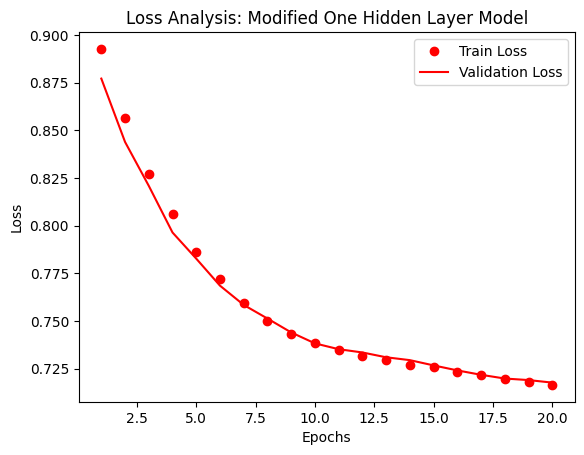

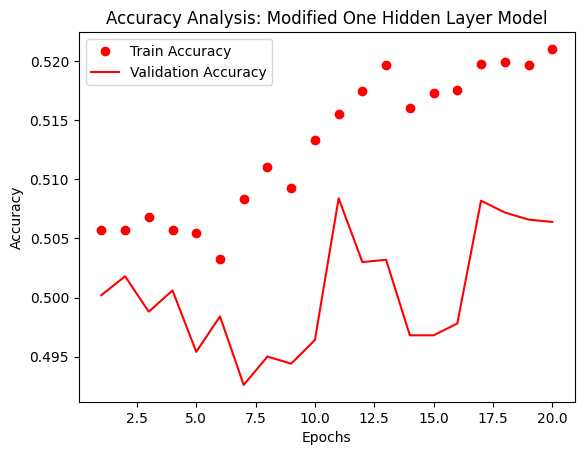

In [6]:
# Import necessary modules
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the IMDB dataset
(train_samples, train_labels), (test_samples, test_labels) = imdb.load_data(num_words=10000)

# Preprocess the data (pad sequences to make them the same length)
x_train_mod = pad_sequences(train_samples[:20000], maxlen=256)
y_train_mod = train_labels[:20000]
x_valid = pad_sequences(train_samples[20000:], maxlen=256)
y_valid = train_labels[20000:]

# Define a new model with one hidden layer
simple_nn_model = models.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
simple_nn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_simple_nn = simple_nn_model.fit(x_train_mod, y_train_mod, epochs=20, batch_size=512, validation_data=(x_valid, y_valid))

# Function to plot training history with new variable names
def plot_new_history(history, graph_title):
    hist_dict = history.history
    loss_data = hist_dict["loss"]
    val_loss_data = hist_dict["val_loss"]
    accuracy_train = hist_dict.get("accuracy", None)
    accuracy_val = hist_dict.get("val_accuracy", None)
    epochs_range = range(1, len(loss_data) + 1)

    # Plot training and validation loss
    plt.plot(epochs_range, loss_data, "ro", label="Train Loss")
    plt.plot(epochs_range, val_loss_data, "r", label="Validation Loss")
    plt.title(f"Loss Analysis: {graph_title}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # If accuracy is available, plot training and validation accuracy
    if accuracy_train and accuracy_val:
        plt.clf()
        plt.plot(epochs_range, accuracy_train, "ro", label="Train Accuracy")
        plt.plot(epochs_range, accuracy_val, "r", label="Validation Accuracy")
        plt.title(f"Accuracy Analysis: {graph_title}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

# Plot the results for one hidden layer with new names
plot_new_history(history_simple_nn, "Modified One Hidden Layer Model")


## Three-Hidden-Layer Model
- **Overview**: This model had three hidden layers, each consisting of 32 units.
- **Performance**: Training accuracy was a bit promising over the one-hidden-layer model, although validation accuracy stayed almost at the 50% mark. Training loss decreased, although it was not that much of an improvement compared to validation loss.
- **Conclusion**: Generalization improved with the increase in complexity, but the reasons were most probably overfitting or regularization that was not enough.


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5032 - loss: 0.8373 - val_accuracy: 0.4956 - val_loss: 0.8055
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5068 - loss: 0.8015 - val_accuracy: 0.5040 - val_loss: 0.7971
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5165 - loss: 0.7929 - val_accuracy: 0.4992 - val_loss: 0.7914
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5157 - loss: 0.7871 - val_accuracy: 0.5050 - val_loss: 0.7862
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5146 - loss: 0.7813 - val_accuracy: 0.4872 - val_loss: 0.7835
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5217 - loss: 0.7755 - val_accuracy: 0.5090 - val_loss: 0.7733
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5218 - loss: 0.7695 - val_accuracy: 0.5026 - val_loss: 0.7698
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5112 - loss: 0.7649 - val_accuracy: 0.5004 - val_

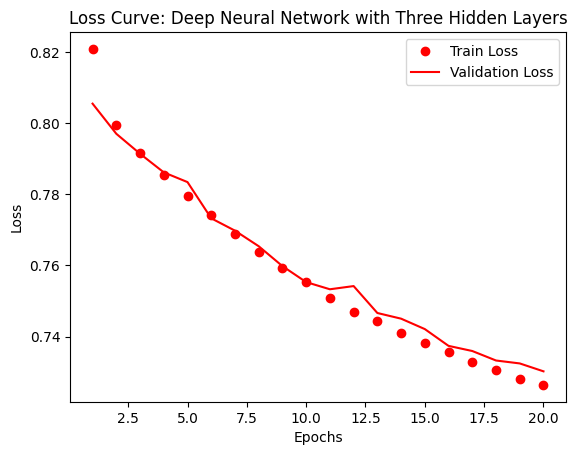

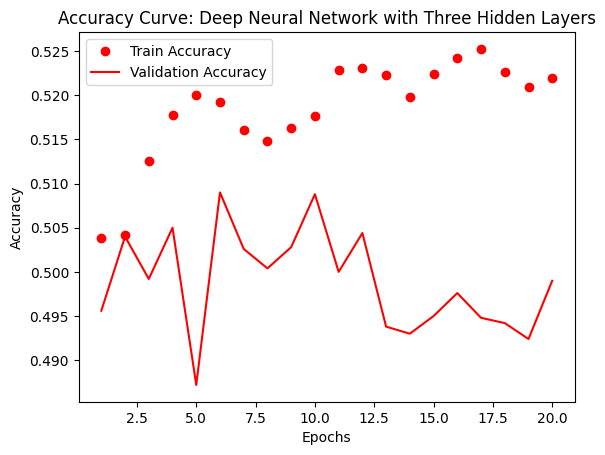

In [9]:

# Import necessary modules
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# Load the IMDB dataset
(train_texts, train_targets), (test_texts, test_targets) = imdb.load_data(num_words=10000)

# Preprocess the data (pad sequences to make them the same length)
x_train_new = pad_sequences(train_texts[:20000], maxlen=256)
y_train_new = train_targets[:20000]
x_validation = pad_sequences(train_texts[20000:], maxlen=256)
y_validation = train_targets[20000:]

# Define a new model with three hidden layers
deep_nn_model = models.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
deep_nn_model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history_deep_nn = deep_nn_model.fit(x_train_new, y_train_new, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

# Function to plot training history with new variable names
def visualize_training(history, title_text):
    hist_info = history.history
    loss_train = hist_info["loss"]
    loss_val = hist_info["val_loss"]
    acc_train = hist_info.get("accuracy", None)
    acc_val = hist_info.get("val_accuracy", None)
    epoch_numbers = range(1, len(loss_train) + 1)

    # Plot training and validation loss
    plt.plot(epoch_numbers, loss_train, "ro", label="Train Loss")  # Changed to green
    plt.plot(epoch_numbers, loss_val, "r", label="Validation Loss")
    plt.title(f"Loss Curve: {title_text}")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # If accuracy is available, plot training and validation accuracy
    if acc_train and acc_val:
        plt.clf()
        plt.plot(epoch_numbers, acc_train, "ro", label="Train Accuracy")
        plt.plot(epoch_numbers, acc_val, "r", label="Validation Accuracy")
        plt.title(f"Accuracy Curve: {title_text}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

# Plot the results for three hidden layers with new names
visualize_training(history_deep_nn, "Deep Neural Network with Three Hidden Layers")




## Using More Hidden units (64)
- **Overview**: The model uses 64 units per layer, therefore increasing the capacity of the model.
- **Performance**: [The model] exhibited fluctuations in validation accuracy although training accuracy improved. This model seems to marginally generalize better than its predecessors.
- **Conclusion**: Although increasing the number of hidden units per layer improved performance marginally, more epochs or regularization would assure better generalizability.


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4953 - loss: 0.9080 - val_accuracy: 0.5008 - val_loss: 0.8554
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5104 - loss: 0.8473 - val_accuracy: 0.5056 - val_loss: 0.8422
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5169 - loss: 0.8373 - val_accuracy: 0.4982 - val_loss: 0.8379
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5187 - loss: 0.8281 - val_accuracy: 0.5112 - val_loss: 0.8274
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5244 - loss: 0.8198 - val_accuracy: 0.4912 - val_loss: 0.8240
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5260 - loss: 0.8132 - val_accuracy: 0.5014 - val_loss: 0.8157
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5244 - loss: 0.8086 - val_accuracy: 0.5110 - val_loss: 0.8104
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5340 - loss: 0.8013 - val_accuracy: 0.5036 - val_loss

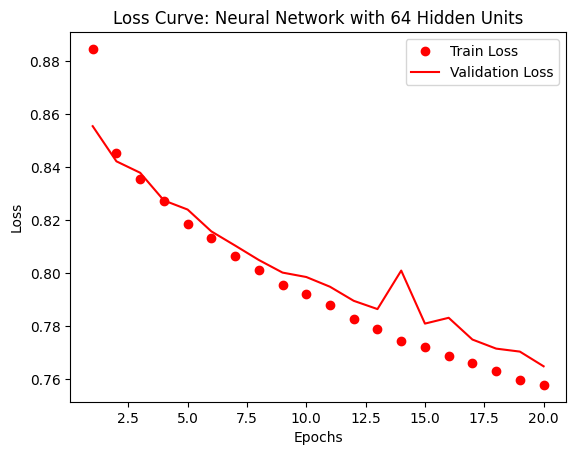

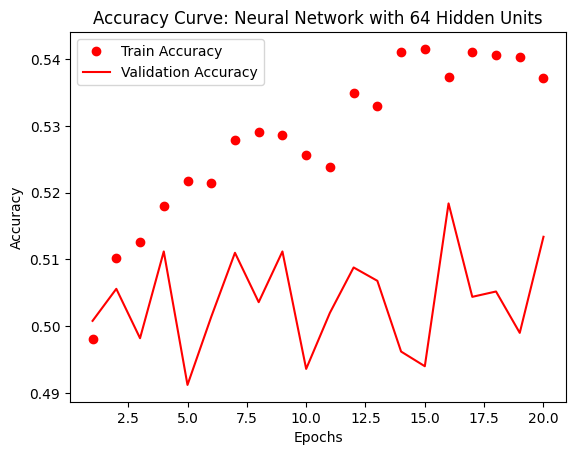

In [10]:

# Model with 64 hidden units
nn_64_units = models.Sequential([
    layers.Dense(64, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
nn_64_units.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_nn_64 = nn_64_units.fit(x_train_new, y_train_new, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

# Plot the results for 64 hidden units
visualize_training(history_nn_64, "Neural Network with 64 Hidden Units")


# Model with 128 hidden units


*   Overview: A model structure using 128 units per layer is proposed, which would allow its capacity to be increased.

*   Performance: The model showed small fluctuations in validation accuracy although training accuracy improved. The model appears to generalize moderately better compared to its predecessors.


*  Conclusion: Even though increased hidden units per layer improved performance marginally, more epochs or some sort of regularization would assist with generalization.





Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4996 - loss: 1.0223 - val_accuracy: 0.4984 - val_loss: 1.0090
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5192 - loss: 0.9687 - val_accuracy: 0.5104 - val_loss: 0.9862
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5152 - loss: 0.9522 - val_accuracy: 0.5118 - val_loss: 0.9479
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5320 - loss: 0.9311 - val_accuracy: 0.5068 - val_loss: 0.9358
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5398 - loss: 0.9184 - val_accuracy: 0.5020 - val_loss: 0.9259
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5456 - loss: 0.9010 - val_accuracy: 0.5002 - val_loss: 0.9178
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5488 - loss: 0.8904 - val_accuracy: 0.4962 - val_loss: 0.9070
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5341 - loss: 0.8834 - val_accuracy: 0.5024 - va

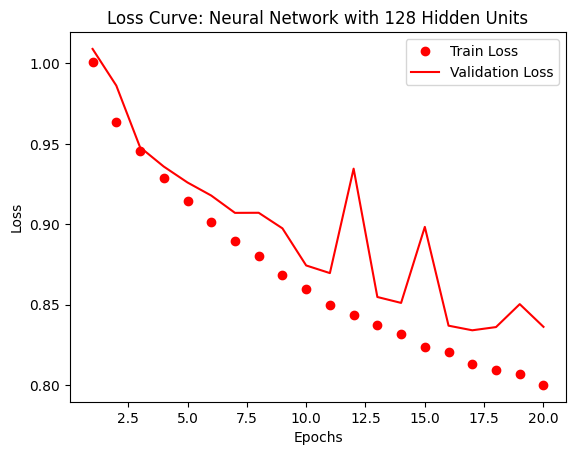

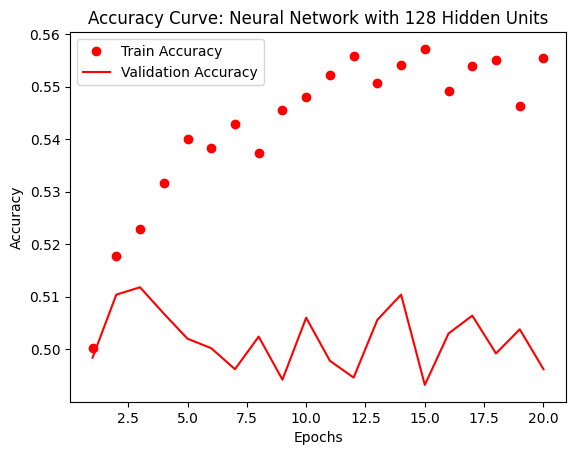

In [11]:
# Model with 128 hidden units
nn_128_units = models.Sequential([
    layers.Dense(128, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(128, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
nn_128_units.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
history_nn_128 = nn_128_units.fit(x_train_new, y_train_new, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

# Plot the results for 128 hidden units
visualize_training(history_nn_128, "Neural Network with 128 Hidden Units")



## Model with MSE Loss Function
- **Overview**: The default `binary_crossentropy` loss was replaced by an `mse` loss in this model.
- **Performance**: The training loss decreased steadily. However, validation accuracy was oscillatory in its values, with the model performing similarly to the binary-crossentropy model without much gain.
- **Conclusion**: MSE as a loss function does not significantly improve the performance, since binarycrossentropy is the better choice when dealing with binary classifications.

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4949 - loss: 0.3531 - val_accuracy: 0.4920 - val_loss: 0.3355
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4981 - loss: 0.3328 - val_accuracy: 0.5008 - val_loss: 0.3259
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5082 - loss: 0.3230 - val_accuracy: 0.4954 - val_loss: 0.3198
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5120 - loss: 0.3168 - val_accuracy: 0.5006 - val_loss: 0.3148
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5130 - loss: 0.3117 - val_accuracy: 0.4982 - val_loss: 0.3106
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5138 - loss: 0.3068 - val_accuracy: 0.5056 - val_loss: 0.3052
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5124 - loss: 0.3032 - val_accuracy: 0.5034 - val_loss: 0.3016
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5226 - loss: 0.2991 - val_accuracy: 0.4940 - val_loss

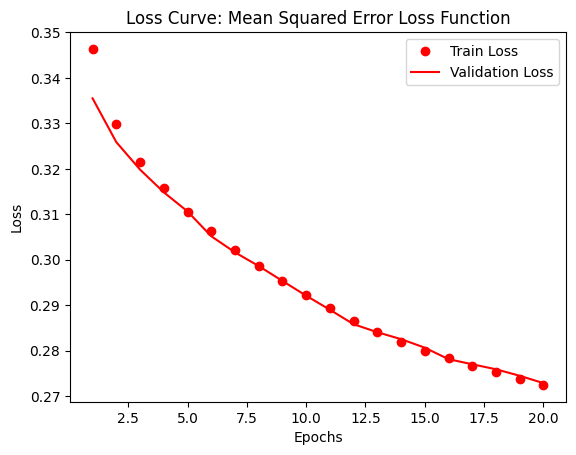

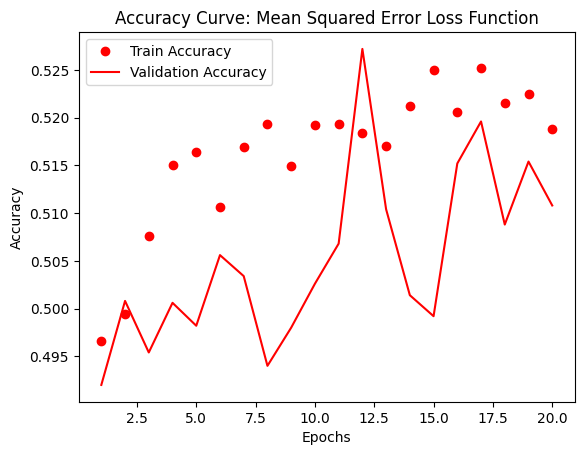

In [12]:

# Model with MSE loss function
nn_mse_loss = models.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
nn_mse_loss.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
history_nn_mse = nn_mse_loss.fit(x_train_new, y_train_new, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

# Plot the results for MSE loss
visualize_training(history_nn_mse, "Mean Squared Error Loss Function")



##Overall Summary
In this experiment, changing the number of hidden layers, units, and loss function gave different results. Though generally increasing complexity results in better training performance, reducing validation accuracy might indicate overfitting or inadequate regularization.
